In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.realpath('..'))

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go
import IPython.display as ipython

import tracking_v2.callback as cb
from tracking_v2.target import NearConstantVelocityTarget
from tracking_v2.tracker.mht import MultiTargetTracker, MhtDecisionClassifier
from tracking_v2.kalman import linear_ncv
from tracking_v2.sensor import GeometricSensor
from tracking_v2.evaluation.runner import TrackerRunner
from tracking_v2.evaluation.plot.mht import MhtInspectCallback, plot_mht
import tracking_v2.evaluation.runner as runner

from tracking_v2.util import to_df, display

In [3]:
display.as_png = True

In [5]:
target_1 = NearConstantVelocityTarget(velocity=[0, 20, 0])
target_2 = NearConstantVelocityTarget(initial_position=[10, 0, 0], velocity=[0, 20, 0])
sensor = GeometricSensor(R=np.eye(3) * 2)

mtt = MultiTargetTracker()
icb = MhtInspectCallback()
dcb = MhtDecisionClassifier(verbose=True)
runner = TrackerRunner([target_1, target_2], [sensor], mtt, [icb, dcb])

runner.run_one(50, 1)
dcb

MhtDecisionClassifier(better_score: 0, already_taken: 0)

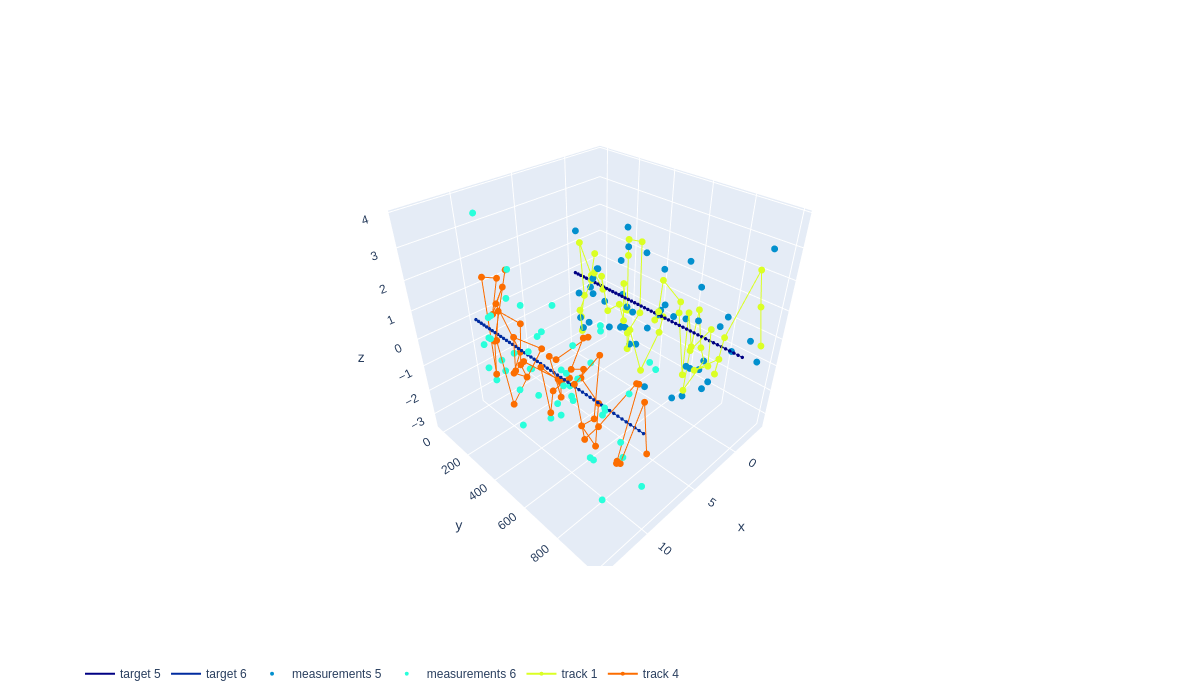

In [7]:
if display.as_png:
    display(plot_mht(icb, lag=3, animate = False))
else:
    fig = plot_mht(icb, lag=3)
    ipython.display(fig)

### in plotly, can I display multiple line segments in a single trace?

Yes, in Plotly, it is possible to display multiple line segments within a single trace. This is achieved by inserting None or np.nan (for NumPy arrays) into your data arrays (x and y) at the points where you want to create a break between line segments.
When Plotly encounters these null values, it interprets them as a discontinuity in the line, effectively creating separate line segments within the same trace object.

### does ipywidgets support tabs

In [8]:
import ipywidgets as widgets
from IPython.display import display

# Create individual widgets to be placed inside the tabs
tab_contents = ['Tab 1 content', 'Tab 2 content', 'Tab 3 content']
children = [widgets.IntSlider(), widgets.Text(), widgets.Dropdown()]

# Create the Tab container
tab = widgets.Tab()

# Set the children of the tab
tab.children = children

# Assign titles to the tabs
tab.set_title(0, 'Slider')
tab.set_title(1, 'Text Box')
tab.set_title(2, 'Dropdown')

# Display the tabbed interface
display(tab)

### ipywidgets and text display

HTML or Textarea